<a href="https://colab.research.google.com/github/matthewzelten/lab-1-phase-2-matthewzelten/blob/main/Copy_of_DATA_301_Lab_1B_Vicky_Lam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

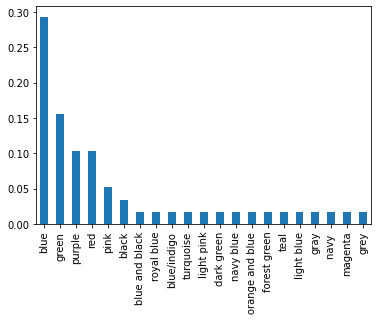

In [7]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_survey = pd.read_csv(url)
df_survey["color"] = df_survey["What is your favorite color?"]
df_survey["color"] = df_survey["color"].str.lower()
col_cnts = df_survey["color"].value_counts(normalize=True)
col_cnts.plot.bar()

Blue seems to be the most favorite color of the students in DATA 301 with green coming second, and purple and red tied. Out of the data gathered, 29% students said their favorite color was blue, 16% for green, and 10% for purple and red.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

In [8]:
joint_sibs_living = pd.crosstab(df_survey["How many siblings do you have?"],
                                df_survey["Where are you living this quarter?"], normalize=True)
temp = joint_sibs_living.sum(axis=1)
joint_sibs_living.divide(temp, axis=0)

Where are you living this quarter?,"Off Campus, but in SLO","Off Campus, outside of SLO",On-Campus housing
How many siblings do you have?,,,
0,0.20,0.80,0.0
1,0.64,0.36,0.0
2,0.55,0.35,0.1
3,0.40,0.60,0.0
5,0.00,1.00,0.0


The first thing I notice is that very little students in DATA 301 are living in on-campus housing, and the ones that do have 2 siblings. Another relationship I see is that most students have 1 or 2 siblings and that they tend to live off campus, whether in SLO or outside of SLO. Another result I see is that the only students with 5 siblings live off campus outside of SLO which is interesting.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

In [9]:
joint_golf_major = pd.crosstab(df_survey["What is your major?"], df_survey['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?'], normalize=True)
joint_golf_major

Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?,2.500000e+03,5.000000e+03,6.500000e+03,7.856000e+03,9.000000e+03,9.200000e+03,1.000000e+04,1.200000e+04,1.500000e+04,2.000000e+04,2.896000e+04,3.000000e+04,3.200000e+04,5.000000e+04,1.000000e+05,1.200000e+05,2.000000e+05,2.500000e+05,3.500000e+05,3.888000e+05,4.000000e+05,4.000010e+05,5.000000e+05,5.750000e+05,6.236280e+05,6.250000e+05,6.600000e+05,6.683642e+05,6.738210e+05,8.000000e+05,9.300000e+05,9.800000e+05,1.000000e+06,1.083623e+06,1.250000e+06,2.000000e+06,3.500000e+06,6.000000e+06,1.000000e+07,1.700000e+07
What is your major?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Computer Science,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000,0.017241,0.034483,0.017241,0.000000,0.000000,0.017241,0.017241,0.000000,0.017241,0.034483,0.017241,0.017241,0.000000,0.017241,0.017241,0.000000,0.017241,0.000000,0.017241,0.017241,0.017241,0.017241,0.000000,0.017241,0.034483,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.017241
Other,0.017241,0.034483,0.000000,0.017241,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.034483,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000
Statistics,0.000000,0.000000,0.017241,0.000000,0.000000,0.017241,0.017241,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.017241,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000


Through the data, we know that there are only 3 groups of students, Statistics, Computer Science majors, and other. Of the answers given from each group, the Statistic majors seemed to have gotten the closest and are in much agreement with each other whereas CS and others were a bit scattered in their answers. The relationship I saw was the Statistic majors had a higher probability of being right in their guesses. I think being artistic can also be another variable with a relationship with the golf balls because artists have a better sense of how much space and volume things take up which may help with their guesses.

## Question 4

Write and answer your own question using this data set.

In [10]:
joint_sports_vg = pd.crosstab(df_survey["Do you consider yourself a sports fan?"], df_survey["Do you enjoy video games?"], normalize=True)
joint_sports_vg

Do you enjoy video games?,No,Yes
Do you consider yourself a sports fan?,,
No,0.120690,0.413793
Yes,0.103448,0.362069


Is there a relationship between enjoying video games and being a sports fan?

Yes, I found that most people answered yes to enjoying video games and that those that did, were split pretty evenly on whether or not they are sports fans with no being the winner by a margin of 5%. I believe this is because there are a bunch of video games where you play sports like FIFA and NBA 2k. Those that answered to not enjoying video games were nearly split evenly on no and yes to being a sports fan. Considering that, I believe that since they don't like video games or sports, they probably enjoy other hobbies.